<a href="https://colab.research.google.com/github/nicolakilgour/Capstone/blob/main/Nicola_Pearson_Excel_to_Python_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?export=view&id=1JWBkqufaNILdD1hBknloAxyZItZBhsXr" width="500"/>

# Welcome Excel to Python Course!

This program is offered by the Vector Institute for professionals who wish to explore some of the concepts discussed during the theory section. No prior coding experience is required.

**Contributors/Instructors:** Diana Moyano (Project Manager), Yinka Oladimeji (Technical Education Specialist) and Andres Rojas (Director of Applied Projects)

**Course Director:** Shingai Manjengwa, Director of Professional Development at Vector Institute
 
***Never stop learning!***

----------

**Dataset**: Complete list of the world's highest-paid athletes published by Forbes since 1990

# Prepare the data

Import the Pandas library

In [ ]:
import pandas as pd

Load the dataset

In [ ]:
#Load the dataset
ta = pd.read_csv('https://raw.githubusercontent.com/DianaMoyano1/Python_EDAs/main/Various/athletes.csv')
ta.head() #Show the first 5 rows 

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings_Usmillion
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [ ]:
#Get all the available sports in the dataset - unique values
ta["Sport"].unique()

array(['boxing', 'auto racing', 'golf', 'basketball', 'tennis', 'nfl',
       'nba', 'baseball', 'ice hockey', 'american football / baseball',
       'f1 motorsports', 'nascar', 'hockey', 'auto racing (nascar)',
       'f1 racing', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

## Question: Who are the top 7 highest paid athletes of all time?

Please produce a table and a plot that answer this question (you can use any visualization tool - Pandas, Seaborn, Matplotlib)

# Answer

First we will extract the two columns we are interested in: 'Name' and 'earnings_Usmillion'. 

In [ ]:
ta[['Name', 'earnings_Usmillion']] #retrieves two columns in the form of a dataframe

,Name,earnings_Usmillion
0,Mike Tyson,28.6
1,Buster Douglas,26.0
2,Sugar Ray Leonard,13.0
3,Ayrton Senna,10.0
4,Alain Prost,9.0
...,...,...
296,Stephen Curry,74.4
297,Kevin Durant,63.9
298,Tiger Woods,62.3
299,Kirk Cousins,60.5


We know from the first extract of the dataset that each record shows earnings in a single year. We are now going to total each althetes earning over time. 

In [ ]:
ta[['Name', 'earnings_Usmillion']].groupby(by='Name').sum() #groups by althelete

,earnings_Usmillion
Name,
Aaron Rodgers,49.0
Aaron Rogers,89.3
Alain Prost,36.0
Alex Rodriguez,116.2
Andre Agassi,105.8
...,...
Terrell Suggs,38.3
Tiger Woods,1373.8
Tom Brady,29.0


We have lost the index column so will re-instate it. 


In [ ]:
ta[['Name', 'earnings_Usmillion']].groupby(by='Name').sum().reset_index() #brings index back as a column

,Name,earnings_Usmillion
0,Aaron Rodgers,49.0
1,Aaron Rogers,89.3
2,Alain Prost,36.0
3,Alex Rodriguez,116.2
4,Andre Agassi,105.8
...,...,...
77,Terrell Suggs,38.3
78,Tiger Woods,1373.8
79,Tom Brady,29.0
80,Valentino Rossi,128.0


Note that rows 0 and 1 are the same athelete. There is a spelling mistake in the second line. We should apply a clustering method to identify potential spelling mistakes to combine these two records into 1. (I have not yet learnt how to do this in python). 

Since grouping, the dataset has been ordered alphabetically. We need to order by earnings. 


In [ ]:
ta[['Name', 'earnings_Usmillion']].groupby(by='Name').sum().reset_index().sort_values('earnings_Usmillion')#sort values based on total earnings per athelete

,Name,earnings_Usmillion
30,Greg Norman,8.5
57,Monica Seles,8.5
20,"Donovan ""Razor"" Ruddock",10.2
53,Michael Moorer,12.1
12,Cecil Fielder,12.7
...,...,...
68,Roger Federer,781.1
14,Cristiano Ronaldo,787.1
25,Floyd Mayweather,840.0
45,LeBron James,844.8


We are interested in the highest earning so need to re-order, highest to lowest. 

In [ ]:
ta[['Name', 'earnings_Usmillion']].groupby(by='Name').sum().reset_index().sort_values('earnings_Usmillion',ascending=False) #sort highest to lowest

,Name,earnings_Usmillion
78,Tiger Woods,1373.8
45,LeBron James,844.8
25,Floyd Mayweather,840.0
14,Cristiano Ronaldo,787.1
68,Roger Federer,781.1
...,...,...
12,Cecil Fielder,12.7
53,Michael Moorer,12.1
20,"Donovan ""Razor"" Ruddock",10.2
30,Greg Norman,8.5


We then list only the top 7 highest earning atheletes of all time.  

In [ ]:
ta[['Name', 'earnings_Usmillion']].groupby(by='Name').sum().reset_index().sort_values('earnings_Usmillion',ascending=False).head(7) #list the 7 highest paid atheletes of all time

,Name,earnings_Usmillion
78,Tiger Woods,1373.8
45,LeBron James,844.8
25,Floyd Mayweather,840.0
14,Cristiano Ronaldo,787.1
68,Roger Federer,781.1
52,Michael Jordan,738.8
48,Lionel Messi,715.5


We can see that even after correction, Aaron Rodgers would not appear in the list of the highest earning atheletes of all time. 

It still begs the question of whether there are any other typos which are preventing atheletes being listed. A simple way of checking for this in a relatively small data set such as this, could be to generate a list of all paid over US$350 million. 

Putting that to one side for just now, we will create a new variable called 'top_7_atheletes'. 

In [ ]:
top_7_atheletes = ta[['Name', 'earnings_Usmillion']].groupby(by='Name').sum().reset_index().sort_values('earnings_Usmillion',ascending=False).head(7) 
top_7_atheletes

,Name,earnings_Usmillion
78,Tiger Woods,1373.8
45,LeBron James,844.8
25,Floyd Mayweather,840.0
14,Cristiano Ronaldo,787.1
68,Roger Federer,781.1
52,Michael Jordan,738.8
48,Lionel Messi,715.5


We would like to produce a graphic of to represent the above. We will import and use two new libraries: Seaborn and Matplotlib to help us. 

In [ ]:
import matplotlib.pyplot as plt # Visualization library
import seaborn as sns # Visualization library

We will produce a bar chart of our results. 

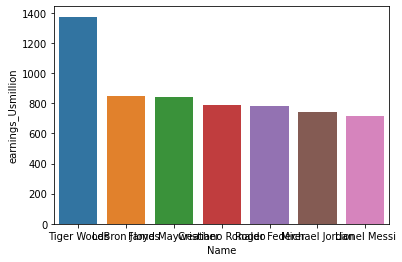

In [ ]:
ax = sns.barplot(x="Name", y="earnings_Usmillion", data = top_7_atheletes)

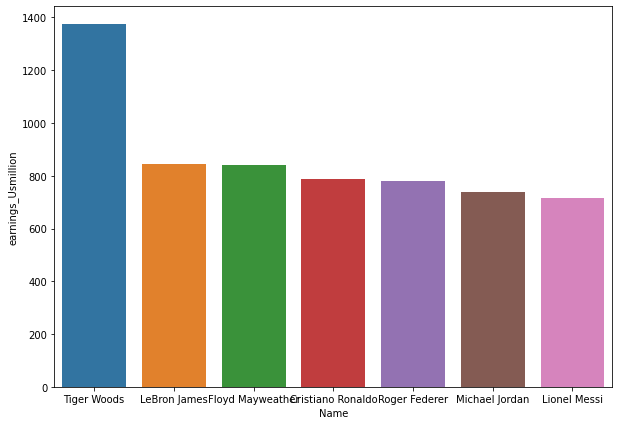

In [ ]:
ax = plt.subplots(figsize=(10, 7)) # create the canvas for plotting - size of W:10 by H:7

#Basic parameters
ax= sns.barplot(x="Name", y="earnings_Usmillion", data=top_7_atheletes)

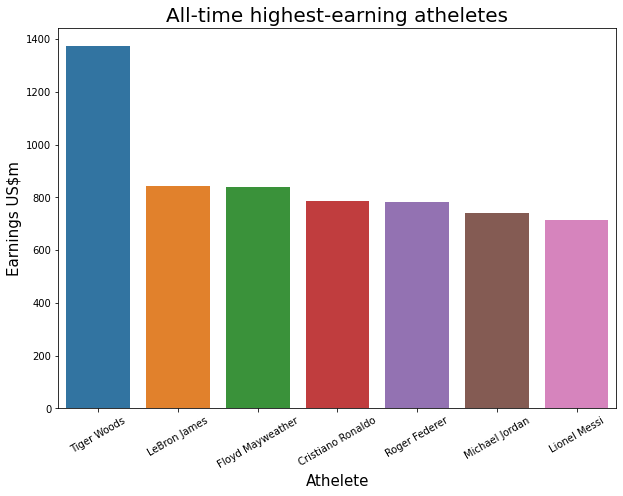

In [ ]:
ax = plt.subplots(figsize=(10, 7)) # create the canvas for plotting - size of W:10 by H:7

#Basic parameters
ax = sns.barplot(x="Name", y="earnings_Usmillion", data=top_7_atheletes)

#Additional parameters
set_ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
title=ax.set_title('All-time highest-earning atheletes',fontsize=20)
y_label=ax.set_ylabel('Earnings US$m',fontsize=15)
x_label=ax.set_xlabel('Athelete',fontsize=15)

# You have completed the Final Assignment

This program is offered by the Vector Institute for professionals who wish to explore some of the concepts discussed during the theory section. No prior coding experience is required.

**Contributors/Instructors:** Diana Moyano (Project Manager), Yinka Oladimeji (Technical Education Specialist) and Andres Rojas (Director of Applied Projects)

**Course Director:** Shingai Manjengwa, Director of Professional Development at Vector Institute
 
***Never stop learning!***